<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/atividade8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class RedeNeural(nn.Module):
    """
    Implementação de uma rede neural conforme especificação da imagem
    Arquitetura:
    - 1 entrada
    - 2 neurônios na primeira camada oculta
    - 2 neurônios na segunda camada oculta
    - 1 saída
    """
    def __init__(self):
        super(RedeNeural, self).__init__()

        # Definindo as camadas da rede
        self.camada1 = nn.Linear(1, 2)    # Primeira camada: 1 entrada -> 2 neurônios
        self.camada2 = nn.Linear(2, 2)    # Segunda camada: 2 entradas -> 2 neurônios
        self.camada_saida = nn.Linear(2, 1)  # Camada de saída: 2 entradas -> 1 saída

        # Função de ativação sigmoid
        self.sigmoid = nn.Sigmoid()

        # Inicializando os pesos e vieses conforme mostrado no slide
        with torch.no_grad():
            # Pesos da primeira camada (w1 e w2)
            self.camada1.weight[0,0] = 3.34
            self.camada1.weight[1,0] = -3.53

            # Vieses da primeira camada (b1 e b2)
            self.camada1.bias[0] = -1.43
            self.camada1.bias[1] = 0.57

            # Pesos da segunda camada (w3 e w4)
            self.camada2.weight[0,0] = -1.22
            self.camada2.weight[1,0] = -2.30

    def forward(self, x):
        """
        Método de propagação para frente (forward pass)
        Args:
            x: Tensor de entrada
        Returns:
            Tensor de saída após passar por todas as camadas
        """
        x = self.camada1(x)
        x = self.sigmoid(x)
        x = self.camada2(x)
        x = self.sigmoid(x)
        x = self.camada_saida(x)
        return x

In [4]:
# Função para visualizar o comportamento da rede
def visualizar_rede(modelo):
    """
    Cria gráficos para visualizar o comportamento da rede
    Args:
        modelo: Instância da RedeNeural
    """
    # Gerando dados de entrada
    x = torch.linspace(-5, 5, 200).reshape(-1, 1)

    # Obtendo as previsões
    with torch.no_grad():
        y = modelo(x)

    # Convertendo para numpy para plotagem
    x_np = x.numpy()
    y_np = y.numpy()

    # Criando a visualização
    plt.figure(figsize=(15, 5))

    # Gráfico 1: Entrada vs Saída
    plt.subplot(1, 2, 1)
    plt.plot(x_np, y_np, 'b-', label='Saída da Rede')
    plt.title('Comportamento da Rede Neural')
    plt.xlabel('Entrada')
    plt.ylabel('Saída')
    plt.grid(True)
    plt.legend()

    # Gráfico 2: Superfície de decisão
    plt.subplot(1, 2, 2)
    plt.scatter(x_np, y_np, c=y_np, cmap='viridis')
    plt.colorbar(label='Valor de Saída')
    plt.title('Superfície de Decisão')
    plt.xlabel('Entrada')
    plt.ylabel('Saída')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Arquitetura da Rede Neural:
RedeNeural(
  (camada1): Linear(in_features=1, out_features=2, bias=True)
  (camada2): Linear(in_features=2, out_features=2, bias=True)
  (camada_saida): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Testes com valores específicos:
Entrada: -2.00 -> Saída: 0.6979
Entrada: 0.00 -> Saída: 0.7138
Entrada: 2.00 -> Saída: 0.7111


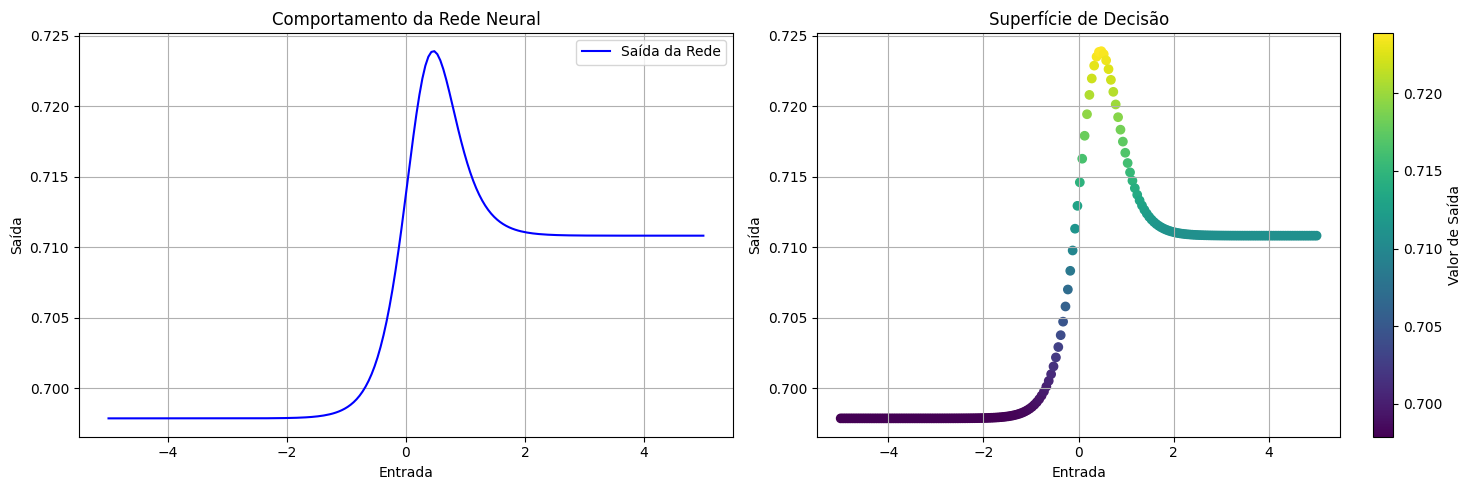

In [5]:
# Criando e testando o modelo
def main():
    # Instanciando o modelo
    modelo = RedeNeural()

    # Visualizando a arquitetura do modelo
    print("Arquitetura da Rede Neural:")
    print(modelo)
    print("\n" + "="*50 + "\n")

    # Testando com alguns valores de entrada
    entradas_teste = torch.tensor([[-2.0], [0.0], [2.0]])
    with torch.no_grad():
        saidas = modelo(entradas_teste)

    print("Testes com valores específicos:")
    for entrada, saida in zip(entradas_teste, saidas):
        print(f"Entrada: {entrada.item():.2f} -> Saída: {saida.item():.4f}")

    # Gerando visualizações
    visualizar_rede(modelo)

if __name__ == "__main__":
    main()

Rede Neural com arquitetura específica:
- Entrada: 1 neurônio
- Camada 1: 2 neurônios (w1=3.34, w2=-3.53, b1=-1.43, b2=0.57)
- Camada 2: 2 neurônios (w3=-1.22, w4=-2.30)
- Saída: 1 neurônio

Comportamento:
- Usa função sigmoid como ativação
- Saídas convergem para intervalo: [0.698 - 0.723]
- Valores típicos:
  * Entrada -2.00 → Saída: 0.6979
  * Entrada 0.00 → Saída: 0.7138
  * Entrada 2.00 → Saída: 0.7111

Visualização:
- Gráfico 1: Mostra curva sigmoide modificada
- Gráfico 2: Mapa de calor da superfície de decisão